In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

#importing csv files
global_temperature = pd.read_csv(r'''C:\Users\pauli\Untitled Folder 1\Project 1\global_temperature.csv''')
city_temperature = pd.read_csv(r'''C:\Users\pauli\Untitled Folder 1\Project 1\cities_temperature.csv''')

#checking they're imported correctly
print(global_temperature.head(5))
print(city_temperature.head(5))

   year  avg_temp  moving_average
0  1750      8.72        8.720000
1  1751      7.98        8.350000
2  1752      5.78        7.493333
3  1753      8.39        7.717500
4  1754      8.47        7.868000
   year  city country  avg_temp  moving_avg
0  1881  Lima    Peru     15.75   15.750000
1  1882  Lima    Peru     15.88   15.815000
2  1883  Lima    Peru     16.18   15.936667
3  1884  Lima    Peru     16.14   15.987500
4  1885  Lima    Peru       NaN   15.987500


In [2]:
#adding columns to global_temp dataset so they are the same as cities in order to union them later
global_temperature['country'] = 'global'
global_temperature['city'] = 'global'

#renaming moving_average column name so it fits cities_temp name
global_temperature = global_temperature.rename(columns={'moving_average':'moving_avg'}) 
print(global_temperature.head(5))

   year  avg_temp  moving_avg country    city
0  1750      8.72    8.720000  global  global
1  1751      7.98    8.350000  global  global
2  1752      5.78    7.493333  global  global
3  1753      8.39    7.717500  global  global
4  1754      8.47    7.868000  global  global


In [3]:
#union of datasets
temp = pd.concat([city_temperature,global_temperature])
temp = temp[temp['year']>=1750]
print(temp)

     year    city country  avg_temp  moving_avg
0    1881    Lima    Peru     15.75   15.750000
1    1882    Lima    Peru     15.88   15.815000
2    1883    Lima    Peru     16.18   15.936667
3    1884    Lima    Peru     16.14   15.987500
4    1885    Lima    Peru       NaN   15.987500
..    ...     ...     ...       ...         ...
261  2011  global  global      9.52    9.578000
262  2012  global  global      9.51    9.534000
263  2013  global  global      9.61    9.570000
264  2014  global  global      9.57    9.582000
265  2015  global  global      9.83    9.608000

[1088 rows x 5 columns]


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Avg Temperature'),
 Text(0.5, 1.0, 'Countries I considered moving to... but not anymore')]

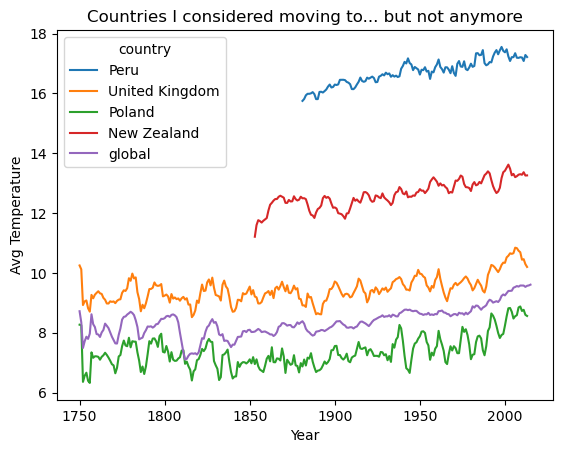

In [4]:
#plotting the graph for countries I've chosen
ax = sns.lineplot(x='year',y='moving_avg', hue='country', data=temp)
ax.set(xlabel='Year',
       ylabel='Avg Temperature',
       #trying to be funny 
       title='Countries I considered moving to... but not anymore')

In [5]:
#it's clearly visible from the graph that trend is positive for all countries, 
#but using Linear Regression to check its value for all of them


reg = LinearRegression()

cities = temp['city'].unique()
for city in cities:
    #filtering dataframe for one city only, so that linear regression is fit to each city separately
    city_data = temp[temp['city'] == city]
    reg.fit(city_data[['year']], city_data['moving_avg'])
    city_trend = reg.coef_[0]
    print(f"{city} Temperature Trend: {city_trend:.4f} degrees per year")


Lima Temperature Trend: 0.0103 degrees per year
London Temperature Trend: 0.0033 degrees per year
Warsaw Temperature Trend: 0.0035 degrees per year
Wellington Temperature Trend: 0.0081 degrees per year
global Temperature Trend: 0.0045 degrees per year


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Avg Temperature'),
 Text(0.5, 1.0, 'Countries I considered moving to... but not anymore')]

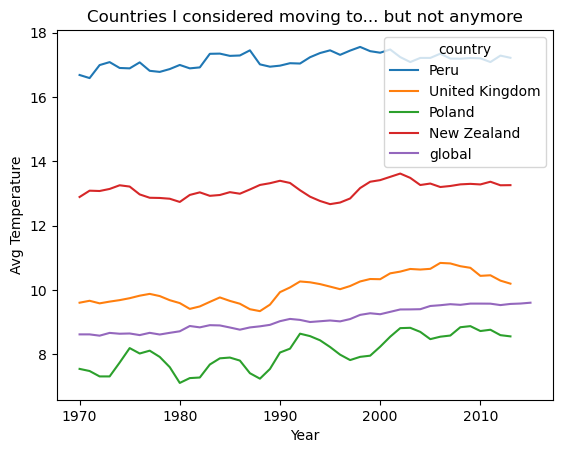

In [6]:
#plotting the graph for countries I've chosen
after_1970 = temp[temp['year']>=1970]
ax = sns.lineplot(x='year',y='moving_avg', hue='country', data=after_1970)
ax.set(xlabel='Year',
       ylabel='Avg Temperature',
       #trying to be funny 
       title='Countries I considered moving to... but not anymore')

In [7]:
cities = after_1970['city'].unique()
for city in cities:
    city_data = after_1970[after_1970['city'] == city]
    reg.fit(city_data[['year']], city_data['moving_avg'])
    city_trend = reg.coef_[0]
    print(f"{city} Temperature Trend: {city_trend:.4f} degrees per year")

Lima Temperature Trend: 0.0107 degrees per year
London Temperature Trend: 0.0286 degrees per year
Warsaw Temperature Trend: 0.0322 degrees per year
Wellington Temperature Trend: 0.0089 degrees per year
global Temperature Trend: 0.0256 degrees per year


In [8]:
global_and_poland = temp[temp['country'].isin(['global','Poland'])]
print(global_and_poland.head(5))                         

     year    city country  avg_temp  moving_avg
411  1750  Warsaw  Poland      8.27      8.2700
412  1751  Warsaw  Poland      8.23      8.2500
413  1752  Warsaw  Poland      2.58      6.3600
414  1753  Warsaw  Poland      7.17      6.5625
415  1754  Warsaw  Poland      7.08      6.6660


In [9]:
global_and_poland=global_and_poland[['year','country','moving_avg']]
#removing years with NaN values
global_and_poland = global_and_poland[global_and_poland['year']<=2013]


In [10]:
global_and_poland = global_and_poland.pivot(index='year', columns='country', values='moving_avg')
print(global_and_poland)

country  Poland    global
year                     
1750     8.2700  8.720000
1751     8.2500  8.350000
1752     6.3600  7.493333
1753     6.5625  7.717500
1754     6.6660  7.868000
...         ...       ...
2009     8.8800  9.580000
2010     8.7280  9.580000
2011     8.7680  9.578000
2012     8.6000  9.534000
2013     8.5620  9.570000

[264 rows x 2 columns]


In [11]:
np.corrcoef(global_and_poland['Poland'], global_and_poland['global'])

array([[1.        , 0.75252915],
       [0.75252915, 1.        ]])